In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar los datos, convertir en dataframe

In [172]:
df = pd.read_csv('./daily_weather_data.csv')

In [173]:
df

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0
...,...,...,...,...,...,...,...,...,...,...,...
324642,07-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7
324643,08-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0
324644,09-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4
324645,10-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.1,18.6,29.7,39.0,28.4,1017.6


In [174]:
df.head()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


## Explorar datos

In [175]:
# Columnas
df.columns

Index(['date', 'country', 'city', 'Latitude', 'Longitude', 'tavg', 'tmin',
       'tmax', 'wdir', 'wspd', 'pres'],
      dtype='object')

In [176]:
# Tamaño de los datos
df.shape

(324647, 11)

In [177]:
# Veamos si tenemos valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324647 entries, 0 to 324646
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       324647 non-null  object 
 1   country    324647 non-null  object 
 2   city       324647 non-null  object 
 3   Latitude   324647 non-null  float64
 4   Longitude  324647 non-null  float64
 5   tavg       314963 non-null  float64
 6   tmin       312284 non-null  float64
 7   tmax       312269 non-null  float64
 8   wdir       283937 non-null  float64
 9   wspd       302400 non-null  float64
 10  pres       289416 non-null  float64
dtypes: float64(8), object(3)
memory usage: 27.2+ MB


### Como podemos ver la cantidad de datos maxima es de 324647 pero alguna columnas como 'tmin', 'tmax', 'wdir', 'wspd; y 'pres' tienen menos datos, lo que nos indica que hay datos nulos en esas columnas

In [178]:
# Veamos si tenemos valores nulos
df.isnull().sum()

date             0
country          0
city             0
Latitude         0
Longitude        0
tavg          9684
tmin         12363
tmax         12378
wdir         40710
wspd         22247
pres         35231
dtype: int64

In [179]:
# como se distribuyen las variables numéricas
df.describe()

,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
count,324647.000000,324647.000000,314963.000000,312284.000000,312269.000000,283937.000000,302400.000000,289416.000000
mean,19.557777,13.989870,21.023282,17.395555,25.042591,163.814931,13.320338,1013.275333
std,26.076725,76.541269,9.309077,9.384259,9.769574,101.923106,7.309672,7.166760
min,-54.430000,-176.176447,-33.800000,-39.300000,-27.300000,0.000000,0.000000,860.200000
25%,4.922420,-51.694138,15.600000,11.300000,19.800000,81.000000,8.100000,1009.900000
50%,18.067519,13.289437,25.000000,21.300000,28.600000,142.000000,11.600000,1012.900000
75%,41.902179,51.531040,27.500000,24.500000,31.200000,251.000000,16.900000,1016.800000
max,78.062000,179.198128,44.100000,38.500000,89.600000,360.000000,105.500000,1058.000000


## Valores atipicos

In [139]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Latitude      36.979759
Longitude    103.225178
tavg          11.900000
tmin          13.200000
tmax          11.400000
wdir         170.000000
wspd           8.800000
pres           6.900000
dtype: float64


In [140]:
rango_inferior = Q1 - 1.5 * IQR
rango_superior = Q3 + 1.5 * IQR

print("Rango superior")
print(rango_inferior)
print("Rango inferior")
print(rango_superior)

Rango superior
Latitude     -50.547218
Longitude   -206.531905
tavg          -2.250000
tmin          -8.500000
tmax           2.700000
wdir        -174.000000
wspd          -5.100000
pres         999.550000
dtype: float64
Rango inferior
Latitude       97.371817
Longitude     206.368807
tavg           45.350000
tmin           44.300000
tmax           48.300000
wdir          506.000000
wspd           30.100000
pres         1027.150000
dtype: float64


In [141]:
df_outliers = (df < rango_inferior) | (df > rango_superior)
df_outliers

/var/folders/99/9fxtc4w56238mm88s7stf7t80000gn/T/ipykernel_39596/590362846.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df < rango_inferior) | (df > rango_superior)


,Latitude,Longitude,city,country,date,pres,tavg,tmax,tmin,wdir,wspd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
324642,False,False,False,False,False,False,False,False,False,False,False
324643,False,False,False,False,False,False,False,False,False,False,False
324644,False,False,False,False,False,False,False,False,False,False,False
324645,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

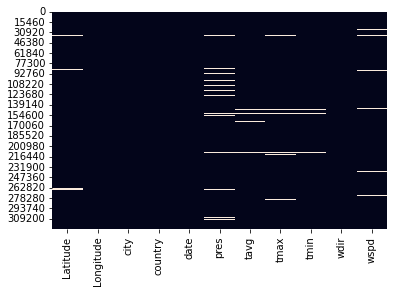

In [142]:
 #Mostar mapa de calor para identificar los valores atípicos
sns.heatmap(df_outliers, cbar=False)

In [143]:
# como se comportan las variables categóricas
df.describe(include=['object'])

,date,country,city
count,324647,324647,324647
unique,1745,194,192
top,29-08-2021,Macau,Kingston
freq,194,1745,3490


In [144]:
# Contabilizar la cantidad de ciudades de cada pais
df['country'].value_counts()

Macau                                1745
North Korea                          1745
Morocco                              1745
Mozambique                           1745
Netherlands                          1745
                                     ... 
Suriname                              648
Northern Cyprus                       648
Myanmar (Burma)                       647
Falkland Islands (Islas Malvinas)     647
Saint Vincent and the Grenadines      580
Name: country, Length: 194, dtype: int64

In [145]:
# Obtener los paises con mayor temperatura
df.groupby('country')['tmax'].mean().sort_values(ascending=False)

country
Sudan                                           38.283611
Chad                                            37.819551
Niger                                           37.754954
Burkina Faso                                    37.188297
Mali                                            36.896536
                                                  ...    
Iceland                                          8.376963
South Georgia and the South Sandwich Islands     6.000879
Greenland                                        2.660298
Bouvet Island                                    0.443715
Svalbard and Jan Mayen                          -3.449057
Name: tmax, Length: 194, dtype: float64

### Antes de graficar o mostrar mas datos, vamos a rellenar los datos nulos con la media en cada caso, ya que como estamso trabajando con muchos datos y numericos podemos utilizar los promedios para rellenar datos faltantes

In [146]:
# Vamos a estudiar los datos nulos
df[['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324647 entries, 0 to 324646
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tavg    314963 non-null  float64
 1   tmin    312284 non-null  float64
 2   tmax    312269 non-null  float64
 3   wdir    283937 non-null  float64
 4   wspd    302400 non-null  float64
 5   pres    289416 non-null  float64
dtypes: float64(6)
memory usage: 14.9 MB


### Como tenemos todo en float no hace falta convertir los datos

In [147]:
# calcular media de tavg para imputar
tavg_mean = df['tavg'].mean()

In [148]:
# imputar valores para reemplazar los nulos
df['tavg'] = df['tavg'].fillna(df['tavg'].mean())
df['tmin'] = df['tmin'].fillna(df['tmin'].mean())
df['tmax'] = df['tmax'].fillna(df['tmax'].mean())
df['wdir'] = df['wdir'].fillna(df['wdir'].mean())
df['wspd'] = df['wspd'].fillna(df['wspd'].mean())
df['pres'] = df['pres'].fillna(df['pres'].mean())

In [149]:
# Obtenemos datos nulos, para verificar que ya no tenemos datos nulos
df[['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324647 entries, 0 to 324646
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tavg    324647 non-null  float64
 1   tmin    324647 non-null  float64
 2   tmax    324647 non-null  float64
 3   wdir    324647 non-null  float64
 4   wspd    324647 non-null  float64
 5   pres    324647 non-null  float64
dtypes: float64(6)
memory usage: 14.9 MB


<AxesSubplot: xlabel='country'>

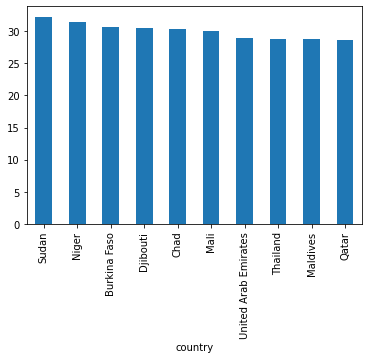

In [150]:
# Graficamos la temperatura promedio por pais, de los 10 paises mas calurosos
df.groupby('country')['tavg'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot: xlabel='country'>

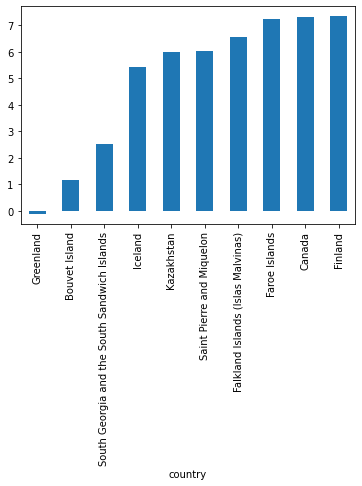

In [151]:
# Graficamos la temperatura promedio por pais, de los 10 paises mas frios
df.groupby('country')['tavg'].mean().sort_values(ascending=True).head(10).plot(kind='bar')

# Vamos a analizar un poco mas a Argentina

In [152]:
# Convertir dates en months
df['month'] = pd.DatetimeIndex(df['date']).month
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '21-07-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '22-07-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '23-07-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/in

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres,month
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6,7
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0,7
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7,7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4,7
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
324642,07-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7,7
324643,08-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0,8
324644,09-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4,9
324645,10-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.1,18.6,29.7,39.0,28.4,1017.6,10


In [153]:
# Obtener las temperaturas promedio durante el verano en la argentina
df[(df['country'] == 'Argentina') & (df['month'] <= 3)]['tavg'].mean()


20.43370786516854

In [154]:
# Obtener las temperaturas promedio durante el invierno en la argentina
df[(df['country'] == 'Argentina') & (df['month'] >= 8) & (df['month'] >= 6)]['tavg'].mean()

17.826647564469916

<AxesSubplot: xlabel='month'>

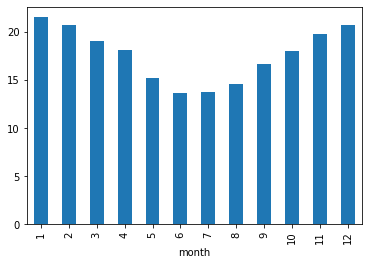

In [155]:
# Graficar temperatura en argentina promedio durante todo el año
df[df['country'] == 'Argentina'].groupby('month')['tavg'].mean().plot(kind='bar')

# Obtenemos datos un poco mas generales como si hay mas paises frios que calurosos, obtener el procentaje

In [156]:
# Obtener porcentaje de paises que tienen temperaturas promedio por encima de 25 grados
df[df['tavg'] > 25]['country'].value_counts()

Maldives          1745
Kiribati          1744
Tuvalu            1743
Guam              1740
Indonesia         1738
                  ... 
Denmark              4
United Kingdom       4
Sweden               4
Norway               4
Guernsey             1
Name: country, Length: 181, dtype: int64

In [157]:
# Obtener porcentaje de paises que tienen temperaturas promedio por debajo de 15 grados
df[df['tavg'] < 10]['country'].value_counts()

South Georgia and the South Sandwich Islands    1680
Greenland                                       1666
Bouvet Island                                   1416
Iceland                                         1391
Faroe Islands                                   1297
                                                ... 
Taiwan                                             6
Egypt                                              3
Vietnam                                            2
Mayotte                                            1
Guadeloupe                                         1
Name: country, Length: 90, dtype: int64

### Podemos ver que son mas los paises con temperaturas elevadas que los paises con temperaturas frias

In [160]:
# filtrar paises por hemisferio segun la latitud
df['hemisferio'] = np.where(df['Latitude'] > 0, 'Norte', 'Sur')

In [161]:
# ver si hay mas presion en los paises del hemisferio norte
df.groupby('hemisferio')['pres'].mean()

hemisferio
Norte    1013.547296
Sur      1012.203817
Name: pres, dtype: float64

## La precion es similiar en los paises del norte y del sur de la tierra

In [162]:
# filtrar paises por oeste o este segun la longitud
df['oeste_este'] = np.where(df['Longitude'] > 0, 'Este', 'Oeste')

In [163]:
# ver si hay mas presion en los paises del oeeste
df.groupby('oeste_este')['pres'].mean()

oeste_este
Este     1013.072502
Oeste    1013.593838
Name: pres, dtype: float64

## Si nos enfocamos en la parte occidental y oriental del mundo tambien la presion es similar

### La verdad no entiendo mucho de meteorologia, estos son todos los datos que se me ocurria extraer